In [1]:
from generate_points import*
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

2022-07-22 22:17:59.063242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-22 22:17:59.063291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Not found
Found GPU at: 


2022-07-22 22:18:20.517067: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-22 22:18:20.579497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-22 22:18:20.579533: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-22 22:18:20.579559: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dell-Inspiron-5448): /proc/driver/nvidia/version does not exist


In [2]:
#mu = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
mu = np.array([0,1])
theta_0 = np.pi/6
n = 2

In [3]:
points = []
for i in range(10000):
    p = generate_point(mu,theta_0,n)
    p *= np.random.uniform(0,1)
    points.append(p)
points = np.array(points)

In [4]:
points

array([[ 1.80215665e-02,  8.39074975e-01],
       [-1.09317488e-02,  3.14392645e-01],
       [ 2.12778426e-02,  1.33389939e-01],
       ...,
       [ 4.30119403e-04,  7.16983959e-02],
       [-2.10156758e-02,  6.16022303e-02],
       [-4.31893304e-02,  8.74214196e-02]])

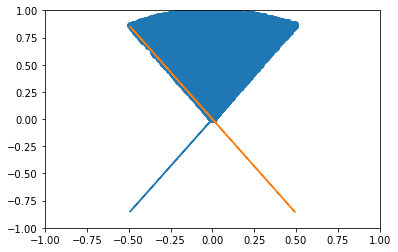

In [5]:
plt.scatter(points[:,0],points[:,1])
plt.plot(points[:,0],np.sqrt(3)*points[:,0])
plt.plot(points[:,0],-np.sqrt(3)*points[:,0])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [7]:
mu = np.array([1,0])
#theta_2 = np.pi/6
theta_2=theta_0
points2 = []
for i in range(10000):
    p = generate_point(mu,theta_2,n)
    p *= np.random.uniform(0,1)
    points2.append(p)
points2 = np.array(points2)

In [8]:
np.sqrt(3)/2

0.8660254037844386

In [2]:
def rotation_matrix(angle):
    M = np.array([[np.cos(angle),np.sin(angle)],
             [-np.sin(angle),np.cos(angle)]])
    return M

In [10]:
mu

array([1, 0])

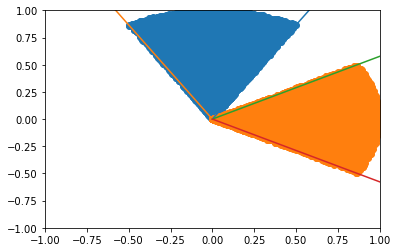

In [11]:
plt.scatter(points[:,0],points[:,1])
plt.scatter(points2[:,0],points2[:,1])
plt.plot(np.linspace(0,1,1000),np.sqrt(3)*np.linspace(0,1,1000))
plt.plot(np.linspace(0,-1,1000),-np.sqrt(3)*np.linspace(0,-1,1000))
plt.plot(np.linspace(0,1,1000),np.sqrt(3)*np.linspace(0,1,1000)/3)
plt.plot(np.linspace(0,1,1000),-np.sqrt(3)*np.linspace(0,1,1000)/3)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [12]:
mu = np.array([1,0])
#theta_3 = np.pi/24
theta_3 = theta_0/4
angle =np.pi/2 -theta_0 -theta_2 +2*theta_3
M = rotation_matrix(angle)
mu = mu@M
"""
points3 = []
for i in range(1000):
    p = generate_point(mu,theta_3,n)
    p *= np.random.uniform(0,1)
    points3.append(p)
points3 = np.array(points3)"""

'\npoints3 = []\nfor i in range(1000):\n    p = generate_point(mu,theta_3,n)\n    p *= np.random.uniform(0,1)\n    points3.append(p)\npoints3 = np.array(points3)'

In [13]:
np.cos(np.pi/12)

0.9659258262890683

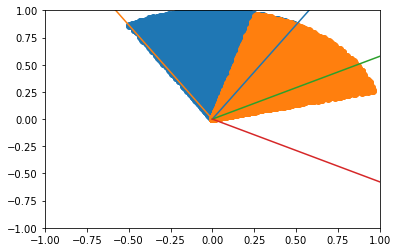

In [14]:
plt.scatter(points[:,0],points[:,1])
points3 = points2@M
plt.scatter(points3[:,0],points3[:,1])
plt.plot(np.linspace(0,1,1000),np.sqrt(3)*np.linspace(0,1,1000))
plt.plot(np.linspace(0,-1,1000),-np.sqrt(3)*np.linspace(0,-1,1000))
plt.plot(np.linspace(0,1,1000),np.sqrt(3)*np.linspace(0,1,1000)/3)
plt.plot(np.linspace(0,1,1000),-np.sqrt(3)*np.linspace(0,1,1000)/3)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [15]:
a = norm(points,axis=1)
b = norm(points3,axis=1)
a = a.reshape(10000,1)
b = b.reshape(10000,1)
M = a@b.T
cos_sim = np.divide(dot(points, points3.T),M)

In [16]:
cos_sim

array([[ 0.82568411,  0.40356765,  0.56692766, ...,  0.07947248,
         0.01659168,  0.28265267],
       [ 0.72902753,  0.25794936,  0.43339608, ..., -0.07488711,
        -0.13748437,  0.13166138],
       [ 0.99661483,  0.88988848,  0.95928487, ...,  0.68982276,
         0.64290143,  0.82389306],
       ...,
       [ 0.72313461,  0.24965976,  0.42565671, ..., -0.08343046,
        -0.14596809,  0.12316099],
       [ 0.92582505,  0.58688948,  0.72743087, ...,  0.28725069,
         0.22641099,  0.47798335],
       [ 0.98930368,  0.91727697,  0.97540408, ...,  0.73477289,
         0.69063583,  0.85849817]])

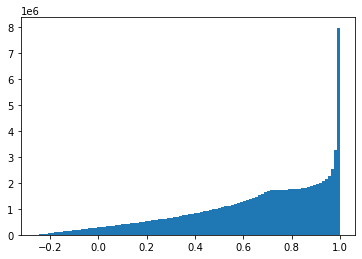

In [17]:
plt.hist(cos_sim.flatten(),100)
plt.show()

In [18]:
np.mean(cos_sim.flatten())

0.6528775119411925

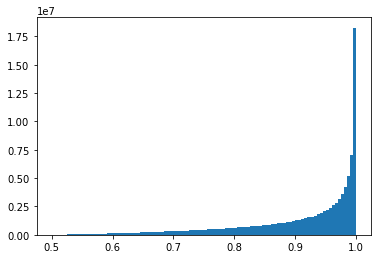

In [19]:
cos_sim = np.divide(dot(points, points.T),a@a.T)
plt.hist(cos_sim.flatten(),100)
plt.show()

In [20]:
np.mean(cos_sim.flatten())

0.9122274459243586

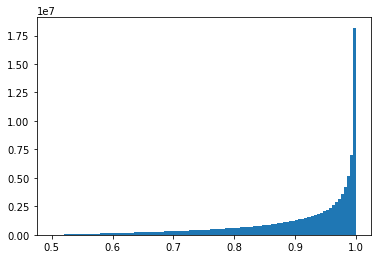

In [21]:
cos_sim = np.divide(dot(points3, points3.T),b@b.T)
plt.hist(cos_sim.flatten(),100)
plt.show()

In [22]:
np.mean(cos_sim.flatten())

0.9117678328275839

In [23]:
R=rotation_matrix(np.pi/7)
sigma = np.array([[0.0,0],[0,1]])
sigma = R@sigma@R.T

In [24]:
x1 = np.random.multivariate_normal([0,0],[[1,0],[0,0]],10000)
x2 = np.random.multivariate_normal([0,0],sigma,10000)
a = norm(x1,axis=1)
b = norm(x2,axis=1)
a = a.reshape(10000,1)
b = b.reshape(10000,1)
M = a@b.T
cos_sim = np.divide(x1@x2.T,M)

In [25]:
np.mean(abs(cos_sim.flatten()))

0.4338837476034272

In [26]:
"""
a = np.array([3,5,6])
b = np.array([1,2,3])
M = a*b[:,None]
M
"""

'\na = np.array([3,5,6])\nb = np.array([1,2,3])\nM = a*b[:,None]\nM\n'

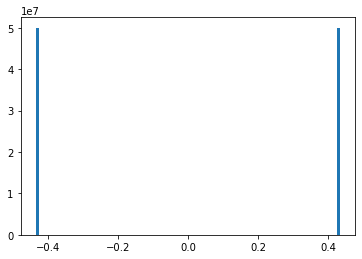

In [27]:
plt.hist(cos_sim.flatten(),100)
plt.show()

In [28]:
cos_sim.max()

0.43392192007493147

In [29]:
sigma

array([[0.1882551 , 0.39091574],
       [0.39091574, 0.8117449 ]])

In [30]:
np.cos(np.pi/2- np.pi/7)

0.4338837391175582

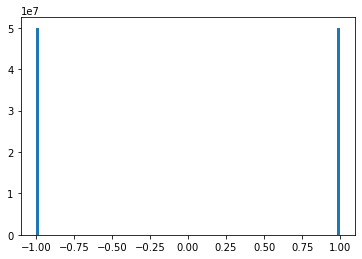

In [31]:
cos_sim = np.divide(dot(x1, x1.T),a@a.T)
plt.hist(cos_sim.flatten(),100)
plt.show()

In [32]:
np.mean(abs(cos_sim.flatten()))

1.0

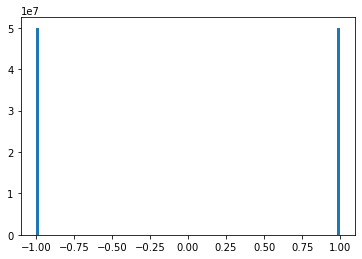

In [33]:
cos_sim = np.divide(dot(x2, x2.T),b@b.T)
plt.hist(cos_sim.flatten(),100)
plt.show()

In [34]:
np.mean(abs(cos_sim.flatten()))

0.9999999999995473

In [3]:
mu_1 = np.array([1,0])
R = rotation_matrix(np.pi/3)
mu_2 = mu_1@R
R = rotation_matrix(np.pi/12)
mu_1 = mu_1 @ R
mu_2 = mu_2 @ R

In [5]:
mu_2,mu_1

(array([0.25881905, 0.96592583]), array([0.96592583, 0.25881905]))

In [14]:
for var in np.linspace(0.1,0.2,10):
    x1 = np.random.multivariate_normal(mu_1,[[var,0],[0,var]],10000)
    x2 = np.random.multivariate_normal(mu_2,[[var,0],[0,var]],10000)
    a = norm(x1,axis=1)
    b = norm(x2,axis=1)
    a = a.reshape(10000,1)
    b = b.reshape(10000,1)
    M = a@b.T
    cos_sim = np.divide(x1@x2.T,M)
    print("---------------------------------------------------")
    print(np.mean(abs(cos_sim.flatten())),np.mean(cos_sim.flatten()))
    plt.hist(cos_sim.flatten(),100)
    plt.savefig(f"transition_{var:.2f}.png")
    plt.cla()
    plt.clf()

---------------------------------------------------
0.5096027759975359 0.4446848047065095
---------------------------------------------------
0.5163196023849809 0.440626448951703
---------------------------------------------------
0.5220496305564021 0.43525483649320224
---------------------------------------------------
0.5305601717467094 0.42899272248584003
---------------------------------------------------
0.5293670443591415 0.4137403983705433
---------------------------------------------------
0.5333424255671504 0.40513982242080604
---------------------------------------------------
0.540943703429139 0.40923780225206846
---------------------------------------------------
0.5479726180626453 0.40542352114289837
---------------------------------------------------
0.5521814884302783 0.39679364460881517
---------------------------------------------------
0.5535027782377205 0.38789723955085154


<Figure size 432x288 with 0 Axes>